In [3]:
import fastf1 as ff1
from matplotlib import pyplot as plt

from fastf1 import plotting

plotting.setup_mpl()

# Variables

In [4]:
directory = '../Telemetry/2021/TUR/Alpine/Qualifying/'
year = 2021
raceNumber = 16

title = 'Turkish GP Q2'

driver1_no_lap = 14
driver2_no_lap = 14

driver1_name = 'OCO'
driver1_fullname = 'Ocon'
driver2_name = 'ALO'
driver2_fullname = 'Alonso'

graphLinediWidth = 0.3
color1 = plotting.TEAM_COLORS['alpine']
color2 = 'yellow'

# Loads Session DATA

In [5]:
ff1.Cache.enable_cache('cache')


quali = ff1.get_session(year, raceNumber, 'Q')

laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Turkish Grand Prix - Qualifying [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['33', '7', '63', '3', '31', '10', '16', '18', '5', '14', '47', '55', '77', '11', '4', '6', '22', '99', '44', '9']


# Initialization

In [6]:
driver1 = laps.pick_driver(driver1_name).pick_wo_box()
driver2 = laps.pick_driver(driver2_name).pick_wo_box()

driver1 = driver1[driver1['LapNumber'] == driver1_no_lap]

driver2 = driver2[driver2['LapNumber'] == driver2_no_lap]


name1 = driver1_fullname
name2 = driver2_fullname

driver1Data = driver1.telemetry
driver2Data = driver2.telemetry

# Telemetry charts

## Speed

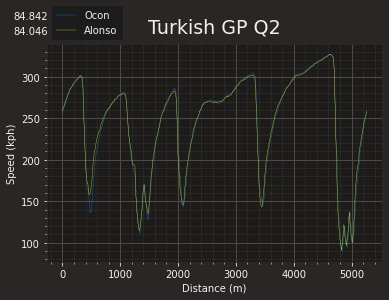

In [7]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Speed'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Speed'], color=color2, linewidth=graphLinediWidth, label=name2)

ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Speed (kph)")
ax.legend(bbox_to_anchor=(0,1),loc=3)

d = driver1.pick_fastest()
d2 = driver2.pick_fastest()

plt.text(-0.05, 1.13, d['LapTime'].total_seconds(),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
plt.text(-0.05, 1.06,d2['LapTime'].total_seconds(),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig(directory + 'telemetrySpeed.png', dpi=1200)
plt.show()

## RMP

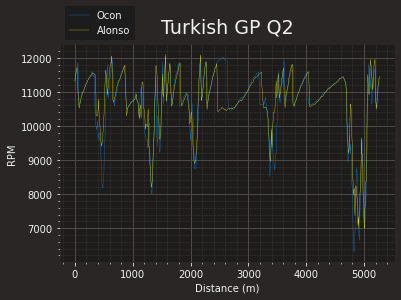

In [8]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['RPM'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['RPM'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("RPM")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryRPM.png', dpi=1200)
plt.show()

## Gear

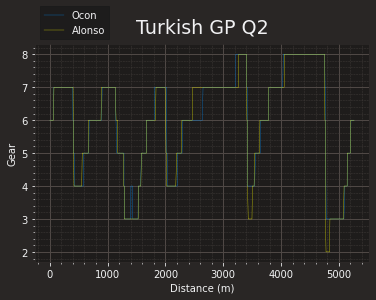

In [9]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['nGear'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['nGear'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Gear")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryGear.png', dpi=1200)
plt.show()

## Throttle Pedal

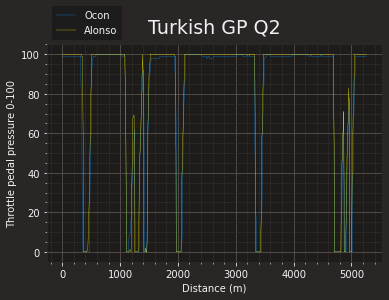

In [10]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Throttle'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Throttle'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Throttle pedal pressure 0-100")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryThrottle.png', dpi=1200)
plt.show()

## Brake Pedal

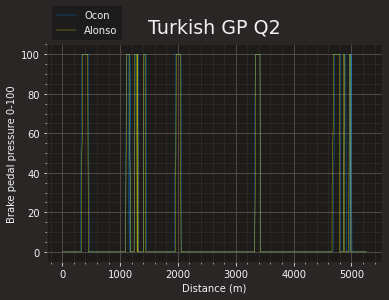

In [11]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Brake'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Brake'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Brake pedal pressure 0-100")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryBrake.png', dpi=1200)
plt.show()

## DRS Activation

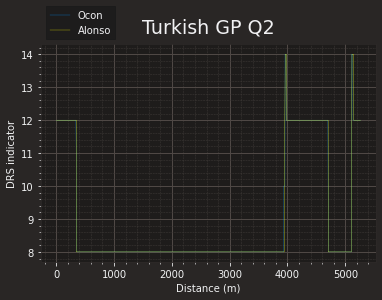

In [12]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['DRS'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['DRS'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("DRS indicator")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryDRS.png', dpi=1200)
plt.show()

# Experimental graphs
## Meters travelled per second

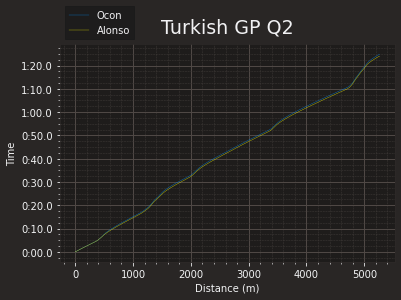

In [13]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Time'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Time'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryTime.png', dpi=1200)
plt.show()

## Percentage of the lap completed per second
### Sector 1 (limits need to be adjusted for other tracks)

213   0 days 00:00:31.965000
Name: Sector1Time, dtype: timedelta64[ns]


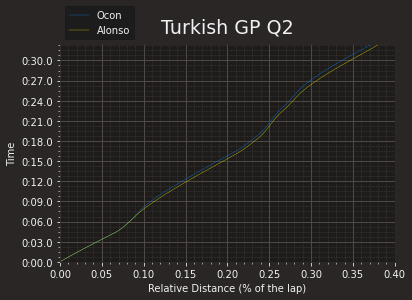

In [14]:
fig, ax = plt.subplots()

driver1Data.add_relative_distance()
driver2Data.add_relative_distance()

print(driver1['Sector1Time'])
sector1Time = 0.0005 * 0.75
plt.ylim(top=0.0005 * 0.75, bottom=0)
plt.xlim(right=0.4)

ax.plot(driver1Data['RelativeDistance'], driver1Data['Time'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['RelativeDistance'], driver2Data['Time'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Relative Distance (% of the lap)")
ax.set_ylabel("Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryTimeSector1.png', dpi=1200)
plt.show()

### Sector 2 (limits need to be adjusted for other tracks)

213   0 days 00:00:29.785000
Name: Sector2Time, dtype: timedelta64[ns]


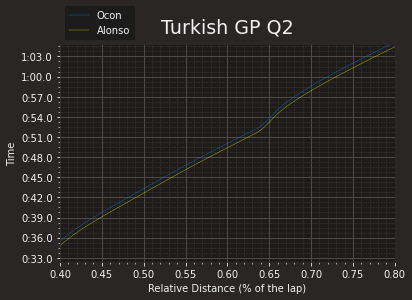

In [15]:
fig, ax = plt.subplots()

driver1Data.add_relative_distance()
driver2Data.add_relative_distance()

print(driver1['Sector2Time'])
sector1Time = 0.0005 * 0.75
plt.ylim(bottom=0.0005 * 0.75, top=sector1Time*2)
plt.xlim(left=0.4, right=0.8)

ax.plot(driver1Data['RelativeDistance'], driver1Data['Time'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['RelativeDistance'], driver2Data['Time'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Relative Distance (% of the lap)")
ax.set_ylabel("Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryTimeSector2.png', dpi=1200)
plt.show()

### Sector 3 (limits need to be adjusted for other tracks)

213   0 days 00:00:29.785000
Name: Sector2Time, dtype: timedelta64[ns]


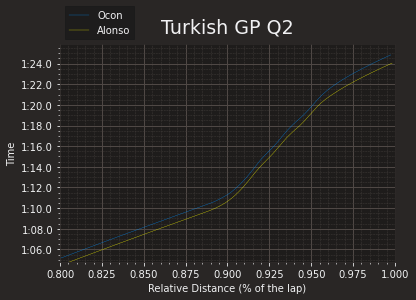

In [16]:
fig, ax = plt.subplots()

driver1Data.add_relative_distance()
driver2Data.add_relative_distance()

print(driver1['Sector2Time'])
sector1Time = 0.0005 * 0.75
plt.ylim(bottom=sector1Time*2, top=sector1Time*2.65)
plt.xlim(left=0.8, right=1)

ax.plot(driver1Data['RelativeDistance'], driver1Data['Time'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['RelativeDistance'], driver2Data['Time'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_xlabel("Relative Distance (% of the lap)")
ax.set_ylabel("Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryTimeSector3.png', dpi=1200)
plt.show()

## time by distance differential

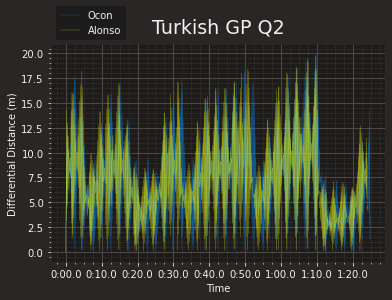

In [17]:
fig, ax = plt.subplots()

driver1Data = driver1.telemetry
driver2Data = driver2.telemetry
dif1 = driver1Data.calculate_differential_distance()
dif2 = driver2Data.calculate_differential_distance()

graphLinediWidth = 0.2

ax.plot(driver1Data['Time'], dif1 , color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Time'], dif2 , color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_ylabel("Differential Distance (m)")
ax.set_xlabel("Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryDifferentialTime.png', dpi=1200)
plt.show()

## Relation between differential distance and total distance done

In [ ]:
fig, ax = plt.subplots()

driver1Data = driver1.telemetry
driver2Data = driver2.telemetry
dif1 = driver1Data.calculate_differential_distance()
dif2 = driver2Data.calculate_differential_distance()

graphLinediWidth = 0.2

ax.plot(driver1Data['Distance'], dif1 , color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], dif2 , color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title(title)
ax.set_ylabel("Differential Distance (m)")
ax.set_xlabel("Distance")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryDifferentialDistance.png', dpi=1200)
plt.show()